# Введение в искусственные нейронные сети
# Урок 2. Keras

## Задание

Используем набор примеров fashion-MNIST
1. Опишите - какой результат получен в нейросети в зависимости от: 
- числа нейронов в слое (для 2-хслойной сети), 
- числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров). 
- фиксируйте для тренировочного и тестового набора метрики accuracy. 
2. Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy. 
3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 
4. Для одного варианта сетей сформируйте матрицу ошибок по классам (sklearn.metrics.plot_confusion_matrix - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html ). Оцените качество модели по каждому классу отдельно (полнота , точность) 
* Поработайте с документацией Keras. Найдите полезные команды не разобранные на уроке


## Решение

In [12]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import fashion_mnist  # набор для работы

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
(train_imagesi,train_labels),(test_imagesi,test_labels)=fashion_mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [3]:
import matplotlib.pyplot as plt

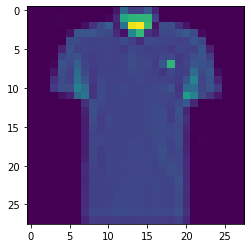

0


In [4]:
plt.imshow(train_imagesi[202,:,:])
plt.show()
print(train_labels[202])

In [5]:
train_images[202,:]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.88188976, -0.36220472, -0.63779528, -0.62992126,
       -0.45669291, -0.79527559, -1.        , -1.        , -1.        ,
       -0.99212598, -0.99212598, -1.        , -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -0.99212598, -0.98425197, -0.99212598, -1.        ,
       -1.        , -1.        , -1.        , -0.97637795, -0.77952756,
        0.22834646,  0.30708661,  0.31496063,  0.31496063, -0.5984252 ,
       -1.        , -1.        , -1.        , -1.        , -0.99212598,
       -1.        , -0.99212598, -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.98425197, -1.        , -1.        , -0.92125984, -0.70866142,
       -0.54330709, -0.4015748 , -0.83464567, -0.2519685 ,  0.94

### 2-слойная модель

Epoch 1/15
80/80 [==============================] - 1s 13ms/step - loss: 1.5207 - accuracy: 0.5497 - val_loss: 0.8267 - val_accuracy: 0.7807
Epoch 2/15
80/80 [==============================] - 1s 10ms/step - loss: 0.7675 - accuracy: 0.7935 - val_loss: 0.6237 - val_accuracy: 0.8205
Epoch 3/15
80/80 [==============================] - 1s 11ms/step - loss: 0.5871 - accuracy: 0.8313 - val_loss: 0.5276 - val_accuracy: 0.8372
Epoch 4/15
80/80 [==============================] - 1s 10ms/step - loss: 0.5027 - accuracy: 0.8462 - val_loss: 0.4741 - val_accuracy: 0.8472
Epoch 5/15
80/80 [==============================] - 1s 10ms/step - loss: 0.4465 - accuracy: 0.8594 - val_loss: 0.4446 - val_accuracy: 0.8536
Epoch 6/15
80/80 [==============================] - 1s 10ms/step - loss: 0.4187 - accuracy: 0.8628 - val_loss: 0.4184 - val_accuracy: 0.8598
Epoch 7/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3869 - accuracy: 0.8718 - val_loss: 0.3960 - val_accuracy: 0.8655
Epoch 8/15
80

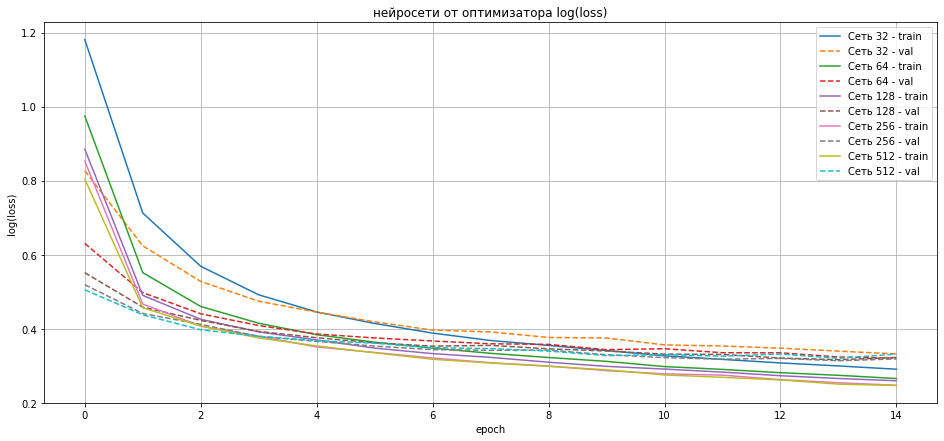

In [14]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

result2 = []

for neuron_num in [32, 64, 128, 256, 512]:
  # Build the model.
  model2 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'),
  Dense(neuron_num, activation='sigmoid'),
  Dense(10, activation='softmax'),
  ])

  # Compile the model.
  model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history2 = model2.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
  )

  # накопление результатов
  model_name = f'Сеть {neuron_num} нейрона'
  model_accuracy = history2.history['accuracy'][epochs-1]
  model_val_accuracy = history2.history['val_accuracy'][epochs-1]
  result2.append([model_name,model_accuracy, model_val_accuracy])

  # картинки
  plt.plot(epoch,history2.history['loss'],'-',label = f'Сеть {neuron_num} - train')
  plt.plot(epoch,history2.history['val_loss'],'--',label = f'Сеть {neuron_num} - val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [15]:
# Оценка accuracy
pd.DataFrame(result2, columns=['model_name','model_accuracy','model_val_accuracy']).sort_values('model_val_accuracy',ascending=False).head(5)

,model_name,model_accuracy,model_val_accuracy
1,Сеть 64 нейрона,0.904354,0.885750
4,Сеть 512 нейрона,0.910333,0.883833
2,Сеть 128 нейрона,0.907188,0.883667
3,Сеть 256 нейрона,0.910375,0.883417
0,Сеть 32 нейрона,0.898438,0.882417


***В двухслойной модели увеличение ширины слоя повышает точность обучения на тренировочной выборке. Наилучшая точность на валидационной выборке - при 64 нейронах в скрытом слое.***

In [23]:
result_dense = []

# Build the model.
model2_64 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
#  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model2_64.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history2_64 = model2_64.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores2_64 = model2_64.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'2-слойная сеть'
mod_accuracy = history2_64.history['accuracy'][epochs-1]
mod_val_accuracy = history2_64.history['val_accuracy'][epochs-1]
test_accuracy = test_scores2_64[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 1s 13ms/step - loss: 1.3486 - accuracy: 0.5996 - val_loss: 0.6260 - val_accuracy: 0.7953
Epoch 2/15
80/80 [==============================] - 1s 11ms/step - loss: 0.5844 - accuracy: 0.8074 - val_loss: 0.4965 - val_accuracy: 0.8321
Epoch 3/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4733 - accuracy: 0.8400 - val_loss: 0.4472 - val_accuracy: 0.8453
Epoch 4/15
80/80 [==============================] - 1s 11ms/step - loss: 0.4224 - accuracy: 0.8553 - val_loss: 0.4109 - val_accuracy: 0.8583
Epoch 5/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3877 - accuracy: 0.8651 - val_loss: 0.4001 - val_accuracy: 0.8579
Epoch 6/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3666 - accuracy: 0.8729 - val_loss: 0.3840 - val_accuracy: 0.8669
Epoch 7/15
80/80 [==============================] - 1s 11ms/step - loss: 0.3524 - accuracy: 0.8755 - val_loss: 0.3756 - val_accuracy: 0.8654
Epoch 8/15
80

### 3-слойная модель

In [24]:
# Build the model.
model3 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history3 = model3.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores3 = model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'3-слойная сеть'
mod_accuracy = history3.history['accuracy'][epochs-1]
mod_val_accuracy = history3.history['val_accuracy'][epochs-1]
test_accuracy = test_scores3[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 15ms/step - loss: 1.3781 - accuracy: 0.5968 - val_loss: 0.6043 - val_accuracy: 0.8092
Epoch 2/15
80/80 [==============================] - 1s 13ms/step - loss: 0.5602 - accuracy: 0.8198 - val_loss: 0.5070 - val_accuracy: 0.8201
Epoch 3/15
80/80 [==============================] - 1s 13ms/step - loss: 0.4564 - accuracy: 0.8453 - val_loss: 0.4272 - val_accuracy: 0.8536
Epoch 4/15
80/80 [==============================] - 1s 13ms/step - loss: 0.4076 - accuracy: 0.8597 - val_loss: 0.4031 - val_accuracy: 0.8568
Epoch 5/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3748 - accuracy: 0.8696 - val_loss: 0.3822 - val_accuracy: 0.8674
Epoch 6/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3546 - accuracy: 0.8773 - val_loss: 0.3704 - val_accuracy: 0.8692
Epoch 7/15
80/80 [==============================] - 1s 13ms/step - loss: 0.3417 - accuracy: 0.8797 - val_loss: 0.3598 - val_accuracy: 0.8742
Epoch 8/15
80

### 5-слойная модель

In [32]:
# Build the model.
model5 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model5.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history5 = model5.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores5 = model5.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'5-слойная сеть'
mod_accuracy = history5.history['accuracy'][epochs-1]
mod_val_accuracy = history5.history['val_accuracy'][epochs-1]
test_accuracy = test_scores5[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 2s 21ms/step - loss: 1.4532 - accuracy: 0.5556 - val_loss: 0.6038 - val_accuracy: 0.8023
Epoch 2/15
80/80 [==============================] - 2s 19ms/step - loss: 0.5358 - accuracy: 0.8301 - val_loss: 0.4494 - val_accuracy: 0.8522
Epoch 3/15
80/80 [==============================] - 2s 19ms/step - loss: 0.4309 - accuracy: 0.8587 - val_loss: 0.4016 - val_accuracy: 0.8625
Epoch 4/15
80/80 [==============================] - 2s 19ms/step - loss: 0.3727 - accuracy: 0.8738 - val_loss: 0.3800 - val_accuracy: 0.8681
Epoch 5/15
80/80 [==============================] - 2s 19ms/step - loss: 0.3535 - accuracy: 0.8758 - val_loss: 0.3635 - val_accuracy: 0.8730
Epoch 6/15
80/80 [==============================] - 1s 19ms/step - loss: 0.3234 - accuracy: 0.8871 - val_loss: 0.3543 - val_accuracy: 0.8769
Epoch 7/15
80/80 [==============================] - 2s 19ms/step - loss: 0.3091 - accuracy: 0.8917 - val_loss: 0.3607 - val_accuracy: 0.8723
Epoch 8/15
80

### 10-слойная модель

In [26]:
# Build the model.
model10 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), 
  Dense(256, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(60, activation='sigmoid'),
  Dense(60, activation='relu'),
  Dense(64, activation='tanh'),
  Dense(128, activation='tanh'),
  Dense(256, activation='relu'),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
history10 = model10.fit(
  train_images,
  to_categorical(train_labels,10),
  epochs=15,
  batch_size=600, validation_split=0.2
)

# Evaluate the model.
test_scores10 = model10.evaluate(
  test_images,
  to_categorical(test_labels)
)

# накопление результатов
mod_name = f'10-слойная сеть'
mod_accuracy = history10.history['accuracy'][epochs-1]
mod_val_accuracy = history10.history['val_accuracy'][epochs-1]
test_accuracy = test_scores10[1]
result_dense.append([mod_name,mod_accuracy, mod_val_accuracy, test_accuracy])

Epoch 1/15
80/80 [==============================] - 3s 29ms/step - loss: 1.7270 - accuracy: 0.4007 - val_loss: 0.7442 - val_accuracy: 0.7544
Epoch 2/15
80/80 [==============================] - 2s 26ms/step - loss: 0.6771 - accuracy: 0.7864 - val_loss: 0.6112 - val_accuracy: 0.8116
Epoch 3/15
80/80 [==============================] - 2s 27ms/step - loss: 0.5436 - accuracy: 0.8301 - val_loss: 0.5035 - val_accuracy: 0.8461
Epoch 4/15
80/80 [==============================] - 2s 26ms/step - loss: 0.4698 - accuracy: 0.8566 - val_loss: 0.4561 - val_accuracy: 0.8561
Epoch 5/15
80/80 [==============================] - 2s 26ms/step - loss: 0.4121 - accuracy: 0.8692 - val_loss: 0.4697 - val_accuracy: 0.8481
Epoch 6/15
80/80 [==============================] - 2s 26ms/step - loss: 0.4142 - accuracy: 0.8653 - val_loss: 0.4293 - val_accuracy: 0.8570
Epoch 7/15
80/80 [==============================] - 2s 26ms/step - loss: 0.3704 - accuracy: 0.8782 - val_loss: 0.4273 - val_accuracy: 0.8605
Epoch 8/15
80

Text(0.5, 1.0, 'Потери от эпох')

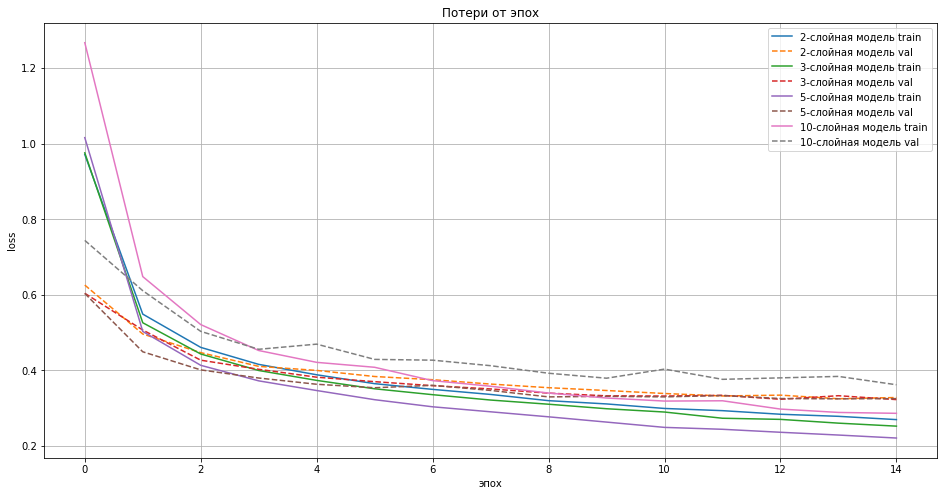

In [33]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['loss'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_loss'],'--', label='2-слойная модель val')
plt.plot(history3.history['loss'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_loss'],'--', label='3-слойная модель val')
plt.plot(history5.history['loss'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_loss'],'--', label='5-слойная модель val')
plt.plot(history10.history['loss'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_loss'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('Потери от эпох')

Text(0.5, 1.0, 'Accuracy от эпох')

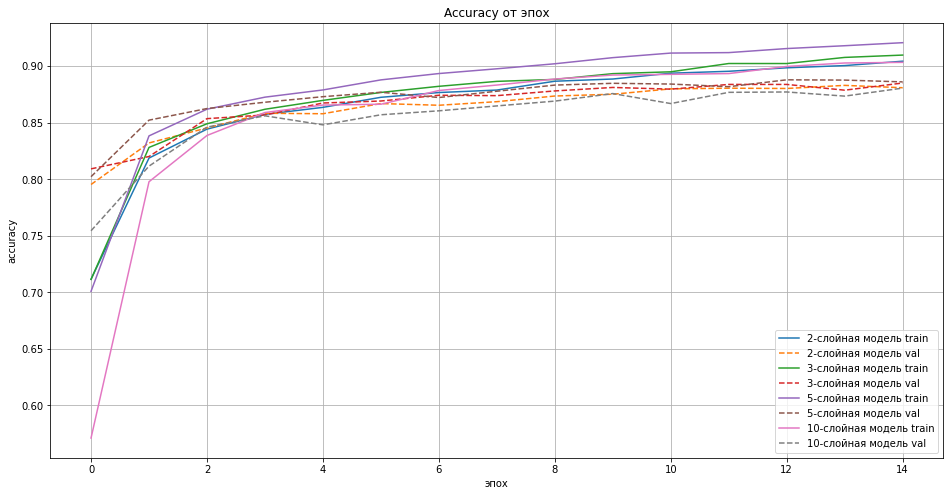

In [34]:
plt.figure(figsize=(16, 8))

plt.plot(history2_64.history['accuracy'],'-', label='2-слойная модель train')
plt.plot(history2_64.history['val_accuracy'],'--', label='2-слойная модель val')
plt.plot(history3.history['accuracy'],'-', label='3-слойная модель train')
plt.plot(history3.history['val_accuracy'],'--', label='3-слойная модель val')
plt.plot(history5.history['accuracy'],'-', label='5-слойная модель train')
plt.plot(history5.history['val_accuracy'],'--', label='5-слойная модель val')
plt.plot(history10.history['accuracy'],'-', label='10-слойная модель train')
plt.plot(history10.history['val_accuracy'],'--', label='10-слойная модель val')
plt.xlabel('эпох')
plt.ylabel('accuracy')
plt.legend()
plt.grid('On')
plt.title('Accuracy от эпох')

In [37]:
# Оценка accuracy
pd.DataFrame(result_dense, columns=['mod_name','mod_accuracy','mod_val_accuracy', 'test_accuracy']).sort_values('mod_val_accuracy',ascending=False).head(5)

,mod_name,mod_accuracy,mod_val_accuracy,test_accuracy
4,5-слойная сеть,0.920750,0.886083,0.8757
2,5-слойная сеть,0.921458,0.885583,0.8796
1,3-слойная сеть,0.909792,0.885083,0.8762
0,2-слойная сеть,0.904375,0.880917,0.8737
3,10-слойная сеть,0.903354,0.880583,0.8733


***В 5-слойной модели точность выше.***

### Эксперимент с разными оптимизаторами для одной начальной модели:
  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

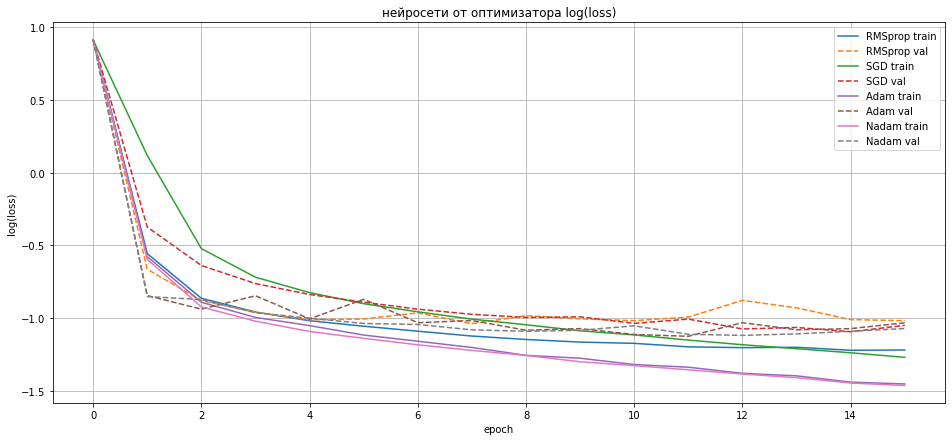

In [40]:
# создаем модель model
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(110, activation='relu'), # Скрытый слой из 110 нейронов с активацией relu
  Dense(256, activation='tanh'), # Скрытый слой из 256 нейронов с активацией tanh
  Dense(128, activation='tanh'), # Скрытый слой из 128 нейронов с активацией tanh
  Dense(64, activation='sigmoid'), # Скрытый слой из 64 нейронов с активацией sigmoid
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

result=[]

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='relu'),
                      Dense(256, activation='tanh'),
                      Dense(128, activation='tanh'),
                      Dense(64, activation='sigmoid'),
                      Dense(10, activation='softmax'),
                      ])
  
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
  train_images,
  to_categorical(train_labels),
  epochs=epochs,
  batch_size=32, validation_split=0.2, verbose = 0
  )

  # накопление результатов
  method_name = modeli.optimizer.get_config()['name']
  method_accuracy = hh.history['accuracy'][14]
  method_val_accuracy = hh.history['val_accuracy'][14]
  result.append([method_name,method_accuracy, method_val_accuracy])


  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [41]:
# Оценка accuracy
import pandas as pd
pd.DataFrame(result, columns=['method_name','method_accuracy','method_val_accuracy']).sort_values('method_val_accuracy',ascending=False).head(4)

,method_name,method_accuracy,method_val_accuracy
3,Nadam,0.914042,0.883083
0,RMSprop,0.895479,0.876417
2,Adam,0.913958,0.876250
1,SGD,0.900104,0.874083


**Вывод**

***Качество классификации в нейросети на тестовом наборе помогла улучшить настройка архитектуры модели:
* подбор ширины скрытого слоя
* подбор количества слоев
* подбор оптимизатора***

In [42]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний для обученной модели (последняя в цикле)

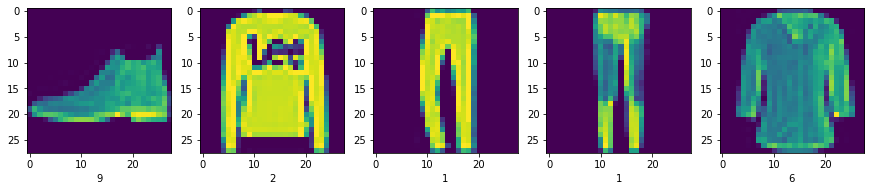

In [43]:
N = 5
y_pred = modeli.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show() 

In [44]:
y_pred_class

array([9, 2, 1, 1, 6])

Оценим предсказания на тестовой выборке.

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
test_pred = np.argmax(modeli.predict(test_images), axis=1)

In [47]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.80      0.79      0.79      1000
           3       0.83      0.90      0.87      1000
           4       0.83      0.77      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.65      0.74      0.70      1000
           7       0.94      0.94      0.94      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [48]:
print(confusion_matrix(test_labels, test_pred))

[[767   2  23  61   7   1 129   0  10   0]
 [  0 968   1  25   3   0   3   0   0   0]
 [  7   1 789  14  68   0 118   0   3   0]
 [  5   9  12 904  26   0  40   0   4   0]
 [  0   2  94  37 774   0  91   0   2   0]
 [  0   0   0   0   0 953   0  25   3  19]
 [ 88   2  66  42  52   0 744   0   6   0]
 [  0   0   0   0   0  29   0 944   0  27]
 [  5   0   0   7   3   1  15   4 965   0]
 [  0   0   0   0   0   9   1  29   0 961]]


In [49]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')
